# Maxwell Dataset - Effort Estimation

@author: bharatnilam

Effort Estimation: Maxwell Data set. Yanfu Li. (2009). Zenodo. http://doi.org/10.5281/zenodo.268461

The goal of the project is to develop an effective effort estimation model achieving best possible accuracy level, optimizing software projects by estimating efforts for the same using machine learning techniques.

## Import Libraries

In [53]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

## Data Import

##### Convert .arff to .csv file

In [54]:
mw_data = arff.loadarff('maxwell.arff')
mw = pd.DataFrame(mw_data[0])
mw.to_csv('maxwell.csv', index=False)

mw = pd.read_csv('maxwell.csv')

## Data Description

In [55]:
mw.head(10)

,Syear,App,Har,Dba,Ifc,Source,Telonuse,Nlan,T01,T02,...,T10,T11,T12,T13,T14,T15,Duration,Size,Time,Effort
0,92.0,2.0,2.0,1.0,2.0,2.0,0.0,3.0,4.0,3.0,...,5.0,4.0,4.0,4.0,4.0,5.0,16.0,647.0,8.0,7871.0
1,93.0,2.0,2.0,1.0,2.0,2.0,0.0,3.0,2.0,3.0,...,3.0,4.0,4.0,4.0,4.0,4.0,5.0,130.0,9.0,845.0
2,90.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,3.0,3.0,...,5.0,4.0,3.0,2.0,3.0,3.0,8.0,254.0,6.0,2330.0
3,86.0,3.0,2.0,1.0,2.0,2.0,0.0,3.0,2.0,2.0,...,4.0,5.0,4.0,3.0,2.0,3.0,16.0,1056.0,2.0,21272.0
4,88.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,3.0,3.0,...,4.0,3.0,4.0,5.0,4.0,4.0,12.0,383.0,4.0,4224.0
5,92.0,2.0,3.0,1.0,2.0,2.0,1.0,4.0,2.0,3.0,...,4.0,4.0,4.0,4.0,5.0,4.0,12.0,345.0,8.0,2826.0
6,87.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,4.0,3.0,...,5.0,3.0,4.0,4.0,2.0,3.0,27.0,209.0,3.0,7320.0
7,86.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,3.0,...,3.0,3.0,3.0,3.0,2.0,3.0,24.0,366.0,2.0,9125.0
8,87.0,2.0,4.0,2.0,2.0,1.0,0.0,2.0,4.0,3.0,...,2.0,2.0,2.0,3.0,4.0,2.0,54.0,1181.0,3.0,11900.0
9,87.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,3.0,...,4.0,2.0,3.0,2.0,3.0,3.0,13.0,181.0,3.0,4300.0


In [56]:
mw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Syear     62 non-null     float64
 1   App       62 non-null     float64
 2   Har       62 non-null     float64
 3   Dba       62 non-null     float64
 4   Ifc       62 non-null     float64
 5   Source    62 non-null     float64
 6   Telonuse  62 non-null     float64
 7   Nlan      62 non-null     float64
 8   T01       62 non-null     float64
 9   T02       62 non-null     float64
 10  T03       62 non-null     float64
 11  T04       62 non-null     float64
 12  T05       62 non-null     float64
 13  T06       62 non-null     float64
 14  T07       62 non-null     float64
 15  T08       62 non-null     float64
 16  T09       62 non-null     float64
 17  T10       62 non-null     float64
 18  T11       62 non-null     float64
 19  T12       62 non-null     float64
 20  T13       62 non-null     float64


In [57]:
nRow, nCol = mw.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 62 rows and 27 columns


In [58]:
mw.columns

Index(['Syear', 'App', 'Har', 'Dba', 'Ifc', 'Source', 'Telonuse', 'Nlan',
       'T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10',
       'T11', 'T12', 'T13', 'T14', 'T15', 'Duration', 'Size', 'Time',
       'Effort'],
      dtype='object')

In [59]:
mw.nunique(axis = 0)

Syear        9
App          5
Har          5
Dba          4
Ifc          2
Source       2
Telonuse     2
Nlan         4
T01          5
T02          5
T03          4
T04          4
T05          5
T06          4
T07          5
T08          4
T09          4
T10          4
T11          4
T12          4
T13          5
T14          5
T15          5
Duration    30
Size        60
Time         9
Effort      62
dtype: int64

In [60]:
mw.describe()

,Syear,App,Har,Dba,Ifc,Source,Telonuse,Nlan,T01,T02,...,T10,T11,T12,T13,T14,T15,Duration,Size,Time,Effort
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,89.580645,2.354839,2.612903,1.032258,1.935484,1.870968,0.241935,2.548387,3.048387,3.048387,...,3.612903,3.419355,3.822581,3.064516,3.258065,3.338710,17.209677,673.306452,5.580645,8223.209677
std,2.131331,0.993368,0.997617,0.442339,0.247676,0.337972,0.431751,1.019119,0.998809,0.711208,...,0.893599,0.984276,0.690075,0.955930,1.007114,0.745336,10.651156,784.084505,2.131331,10499.903168
min,85.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,48.000000,1.000000,583.000000
25%,88.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,...,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,10.000000,232.500000,4.000000,2388.750000
50%,90.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,13.500000,385.000000,6.000000,5189.500000
75%,91.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,3.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,23.500000,640.750000,7.000000,9308.000000
max,93.000000,5.000000,5.000000,4.000000,2.000000,2.000000,1.000000,4.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,54.000000,3643.000000,9.000000,63694.000000


In [61]:
mw.isnull().sum()

Syear       0
App         0
Har         0
Dba         0
Ifc         0
Source      0
Telonuse    0
Nlan        0
T01         0
T02         0
T03         0
T04         0
T05         0
T06         0
T07         0
T08         0
T09         0
T10         0
T11         0
T12         0
T13         0
T14         0
T15         0
Duration    0
Size        0
Time        0
Effort      0
dtype: int64

## EDA

In [62]:
mw.corr()

,Syear,App,Har,Dba,Ifc,Source,Telonuse,Nlan,T01,T02,...,T10,T11,T12,T13,T14,T15,Duration,Size,Time,Effort
Syear,1.000000,-0.160855,0.130573,-0.054970,-0.145259,-0.053592,0.450547,0.334031,0.117500,-0.051284,...,0.119950,0.225865,0.115776,-0.187659,0.318550,0.235356,-0.412739,0.017363,1.000000,-0.197499
App,-0.160855,1.000000,0.025080,-0.213018,0.227835,0.040953,-0.012330,0.015149,-0.331517,0.091319,...,-0.322890,-0.020553,-0.074058,-0.041767,0.087218,-0.032141,0.147793,0.056581,-0.160855,0.044230
Har,0.130573,0.025080,1.000000,0.288806,-0.235426,-0.588159,-0.083487,0.034849,0.298793,-0.065589,...,-0.097285,-0.049008,-0.172835,-0.059334,0.247906,-0.019202,0.060219,0.058396,0.130573,-0.060339
Dba,-0.054970,-0.213018,0.288806,1.000000,0.019308,-0.081358,-0.041535,0.032846,0.219039,-0.109262,...,0.032109,-0.182191,-0.034649,0.188844,0.128203,0.065764,0.102926,-0.005985,-0.054970,-0.012853
Ifc,-0.145259,0.227835,-0.235426,0.019308,1.000000,0.486446,0.148359,-0.117324,-0.185978,0.297210,...,-0.188760,-0.021692,-0.355817,-0.120613,-0.195045,-0.412511,0.228926,-0.091403,-0.145259,0.074087
Source,-0.053592,0.040953,-0.588159,-0.081358,0.486446,1.000000,0.217443,-0.029171,-0.418269,0.231004,...,-0.005253,0.214607,0.040813,0.127672,-0.093218,-0.214129,-0.087995,-0.121408,-0.053592,0.030936
Telonuse,0.450547,-0.012330,-0.083487,-0.041535,0.148359,0.217443,1.000000,0.438675,-0.065606,-0.198912,...,-0.008224,0.374562,0.146431,-0.117879,-0.145941,0.148721,0.035131,0.151446,0.450547,0.070786
Nlan,0.334031,0.015149,0.034849,0.032846,-0.117324,-0.029171,0.438675,1.000000,0.118450,-0.172916,...,0.290923,0.567783,0.350407,0.080880,0.195274,0.377338,0.067766,0.386770,0.334031,0.274311
T01,0.117500,-0.331517,0.298793,0.219039,-0.185978,-0.418269,-0.065606,0.118450,1.000000,-0.095660,...,0.223370,0.012372,0.012659,0.048186,-0.142993,0.241875,0.219388,0.252199,0.117500,0.208369
T02,-0.051284,0.091319,-0.065589,-0.109262,0.297210,0.231004,-0.198912,-0.172916,-0.095660,1.000000,...,0.004160,-0.216809,-0.115831,-0.004667,0.096717,-0.124202,-0.124715,-0.057676,-0.051284,-0.100439


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

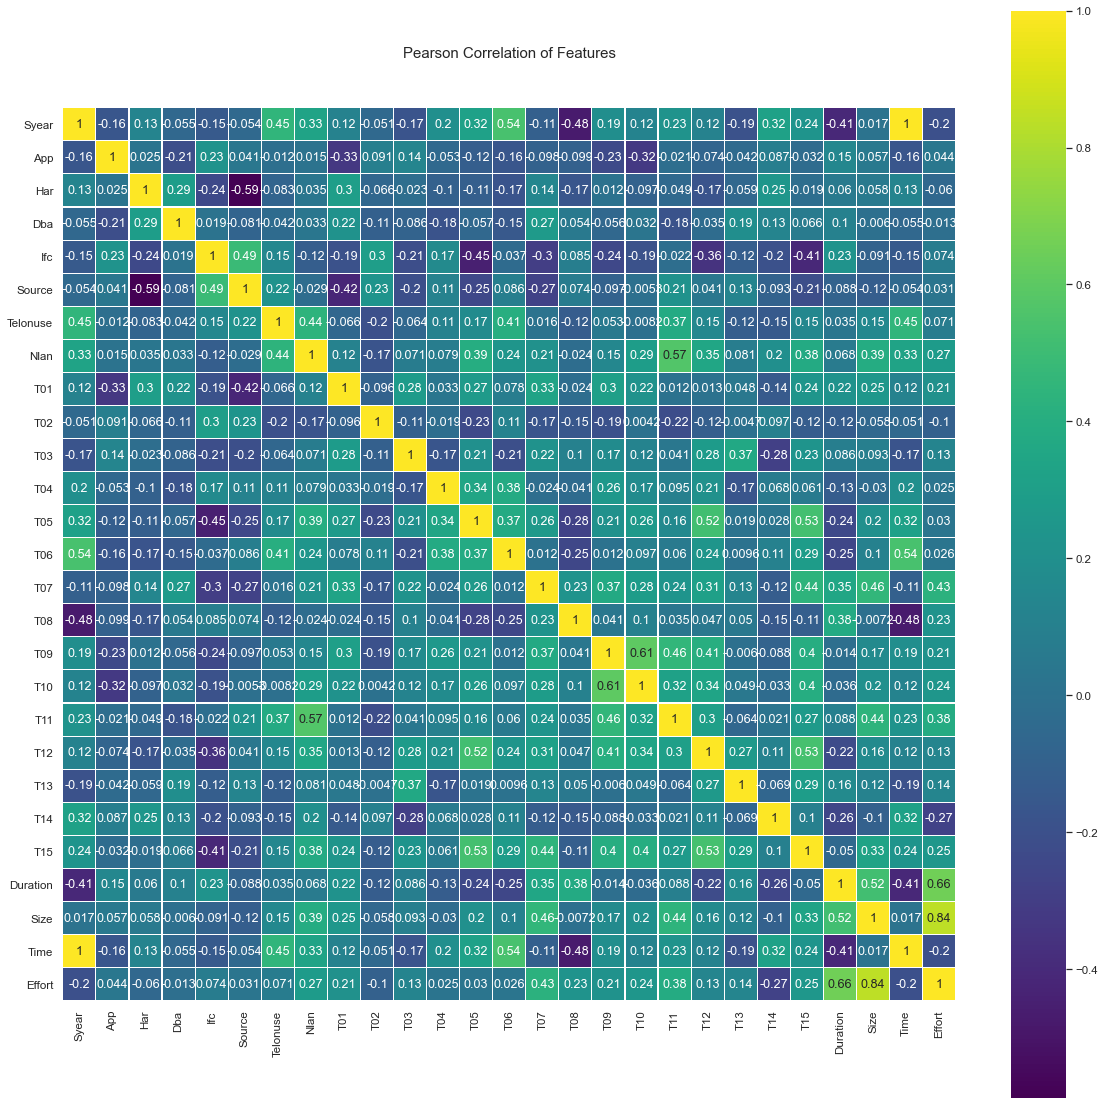

In [63]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(mw.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

### Feature Selection

##### Mutual Information Regression

In [64]:
from sklearn.feature_selection import mutual_info_regression

X = mw.drop('Effort', axis = 1)
y = mw['Effort']

mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.        , 0.03652995, 0.00360325, 0.01802458, 0.00971255,
       0.01735028, 0.        , 0.03390835, 0.        , 0.03136469,
       0.        , 0.        , 0.00682079, 0.        , 0.16613628,
       0.03641108, 0.08134936, 0.01070363, 0.0901374 , 0.00763438,
       0.        , 0.00853406, 0.01093285, 0.36850942, 0.44326063,
       0.        ])

In [65]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Size        0.443261
Duration    0.368509
T07         0.166136
T11         0.090137
T09         0.081349
App         0.036530
T08         0.036411
Nlan        0.033908
T02         0.031365
Dba         0.018025
Source      0.017350
T15         0.010933
T10         0.010704
Ifc         0.009713
T14         0.008534
T12         0.007634
T05         0.006821
Har         0.003603
Telonuse    0.000000
Time        0.000000
T01         0.000000
T03         0.000000
T04         0.000000
T06         0.000000
T13         0.000000
Syear       0.000000
dtype: float64

<AxesSubplot:>

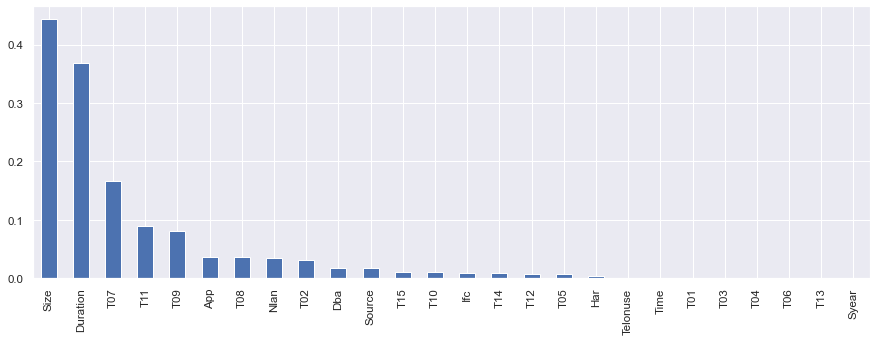

In [66]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [67]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=25)
selected_top_columns.fit(X, y)
X.columns[selected_top_columns.get_support()]

Index(['App', 'T07', 'T08', 'T09', 'T11', 'Duration', 'Size'], dtype='object')

##### Function to select highly correlated columns

In [68]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [69]:
corr_features = correlation(mw, 0.55)
len(set(corr_features))

5

In [70]:
corr_features

{'Effort', 'Source', 'T10', 'T11', 'Time'}

##### Pivot table using columns selected using mutual info regression and correlation function

In [71]:
pd.pivot_table(mw, index = ['App', 'T07', 'T08', 'T09', 'T10', 'T11', 'Duration', 'Size', 'Source', 'Time'], values = 'Effort').sort_values('Effort', ascending = False)

Effort
App T07 T08 T09 T10 T11 Duration Size   Source Time         
2.0 4.0 5.0 4.0 4.0 4.0 45.0     3368.0 2.0    3.0   63694.0
3.0 4.0 3.0 5.0 5.0 5.0 33.0     3643.0 2.0    7.0   39479.0
2.0 5.0 4.0 5.0 4.0 5.0 38.0     2482.0 2.0    5.0   37286.0
    4.0 5.0 4.0 4.0 4.0 32.0     1849.0 2.0    7.0   25910.0
3.0 3.0 5.0 4.0 4.0 5.0 16.0     1056.0 2.0    2.0   21272.0
...                                                      ...
2.0 3.0 4.0 3.0 4.0 2.0 6.0      204.0  2.0    5.0     963.0
3.0 1.0 4.0 4.0 3.0 4.0 7.0      108.0  2.0    7.0     900.0
2.0 2.0 2.0 4.0 3.0 4.0 5.0      130.0  2.0    9.0     845.0
1.0 4.0 4.0 4.0 4.0 3.0 9.0      65.0   2.0    6.0     796.0
3.0 2.0 4.0 4.0 3.0 5.0 10.0     48.0   2.0    6.0     583.0

[62 rows x 1 columns]

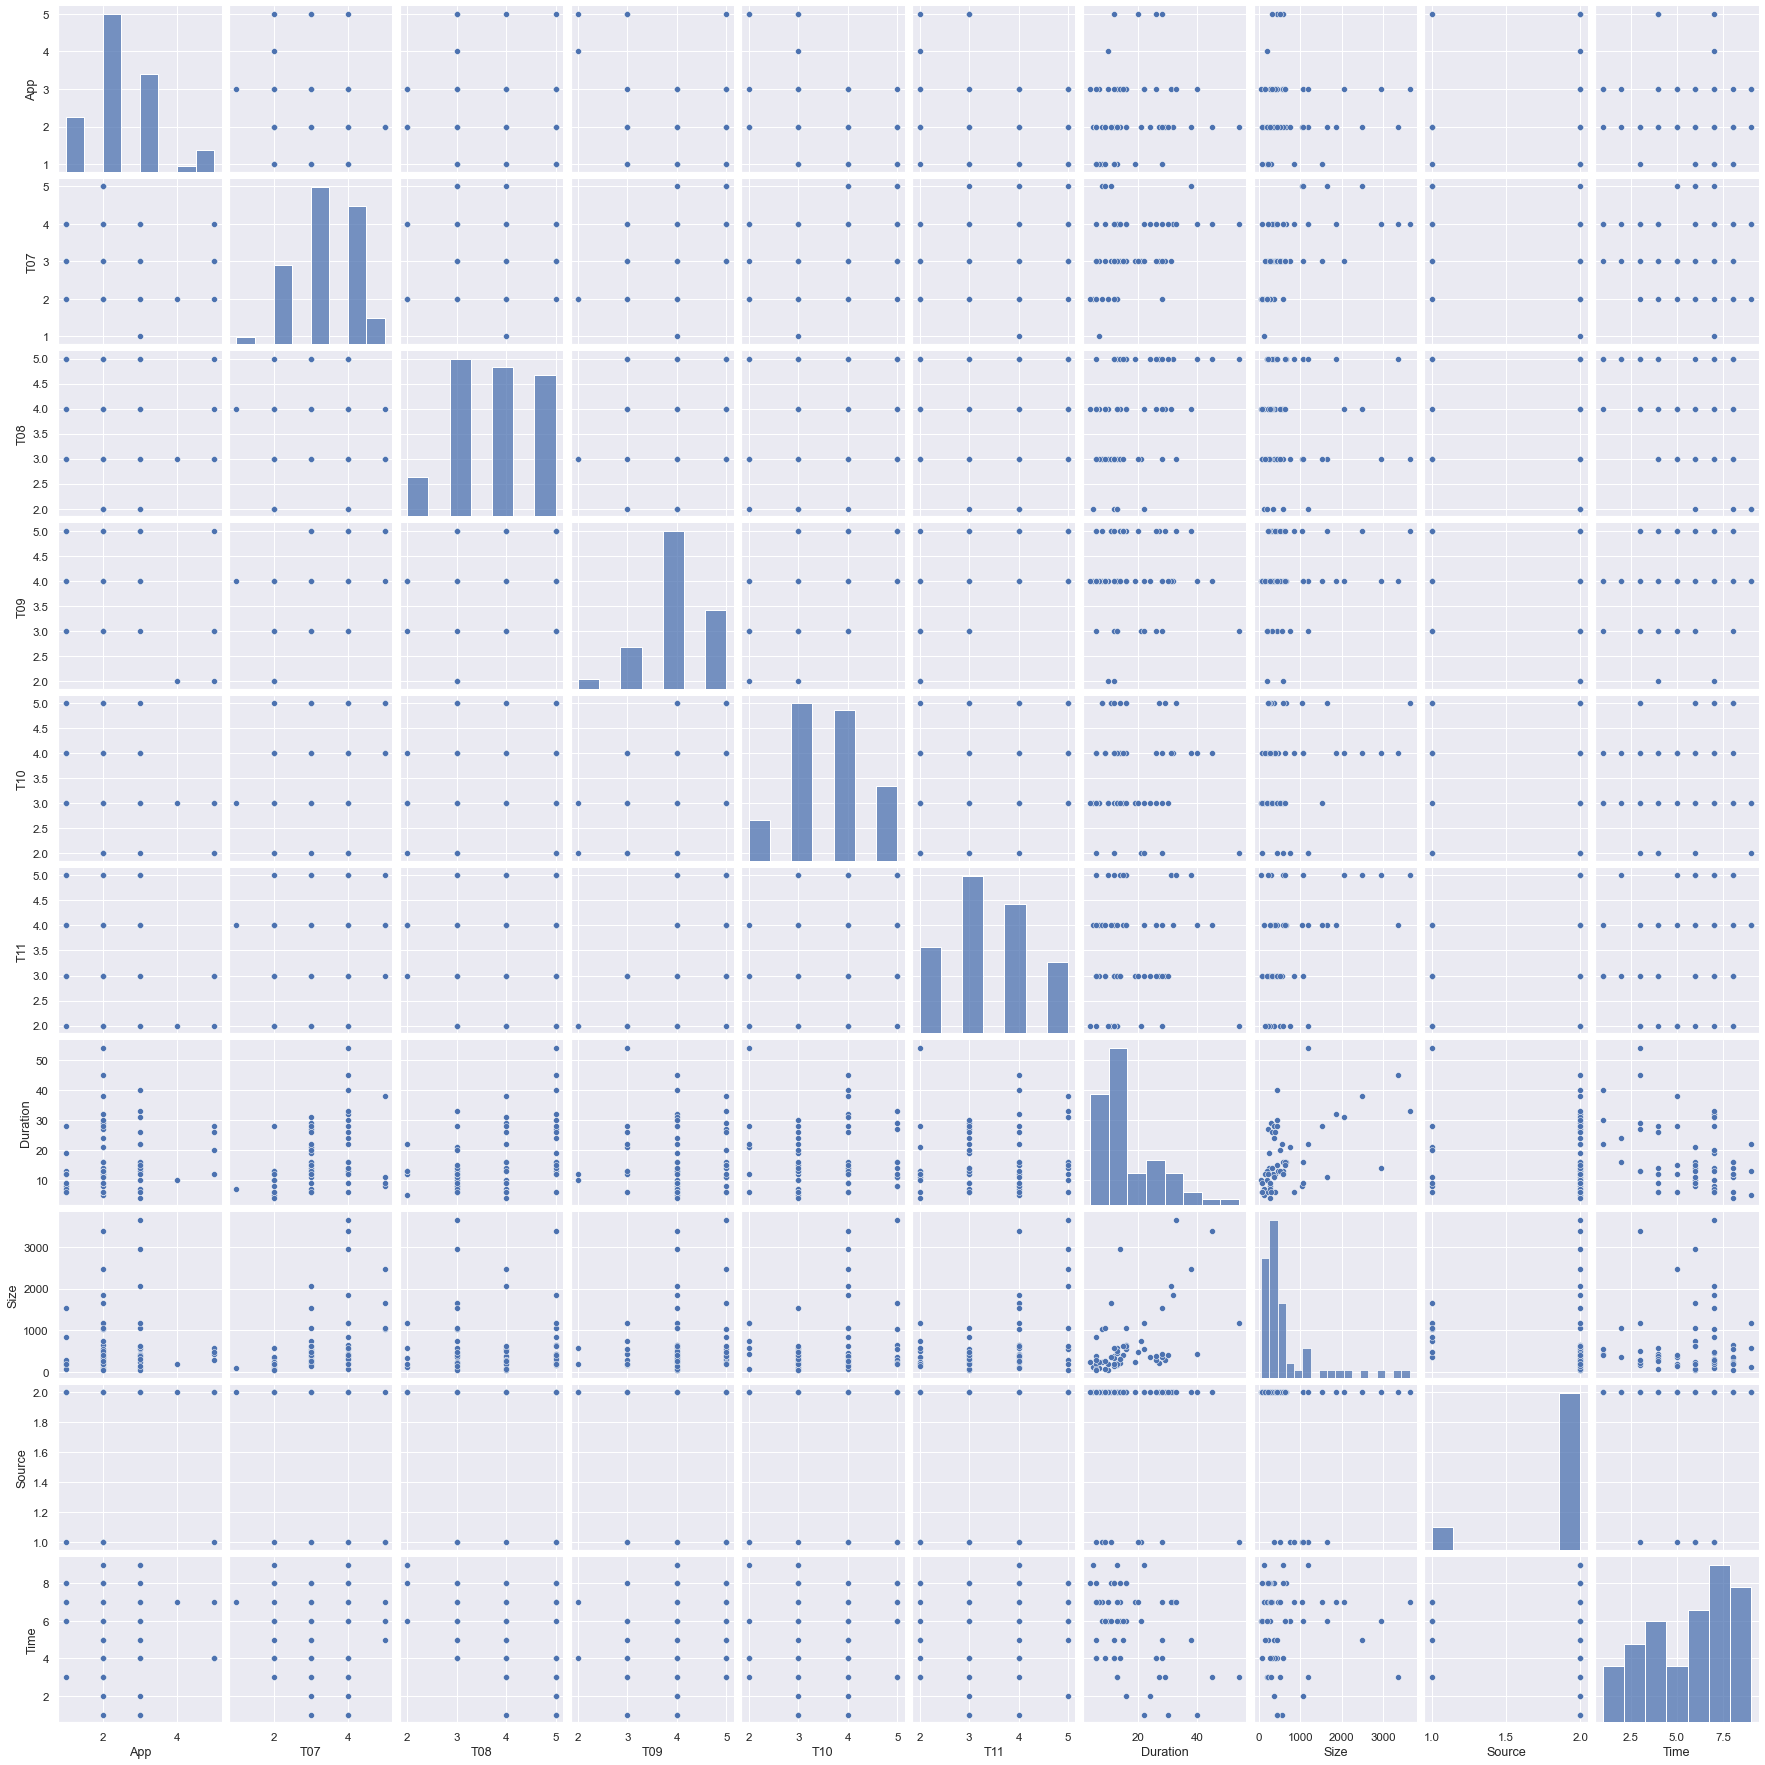

In [72]:
sns.pairplot(mw[['App', 'T07', 'T08', 'T09', 'T10', 'T11', 'Duration', 'Size', 'Source', 'Time']])

##### Scatter plots between selected features and Effort

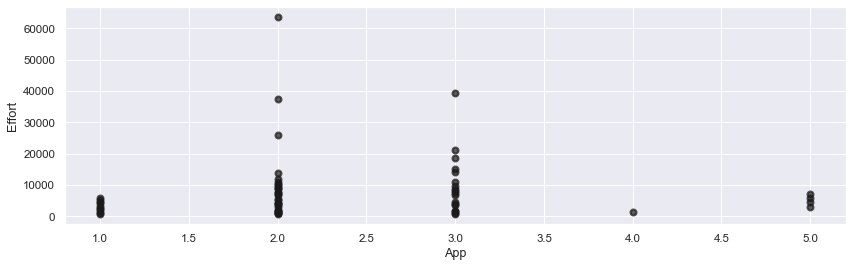

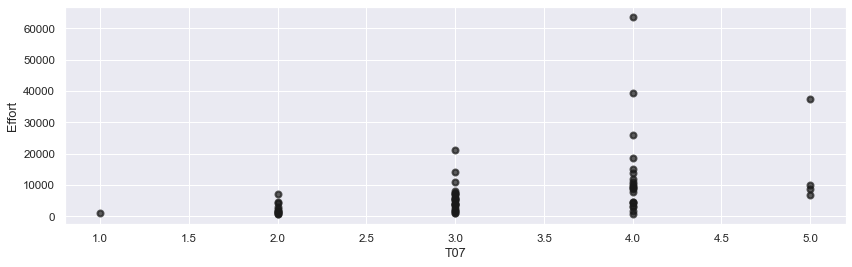

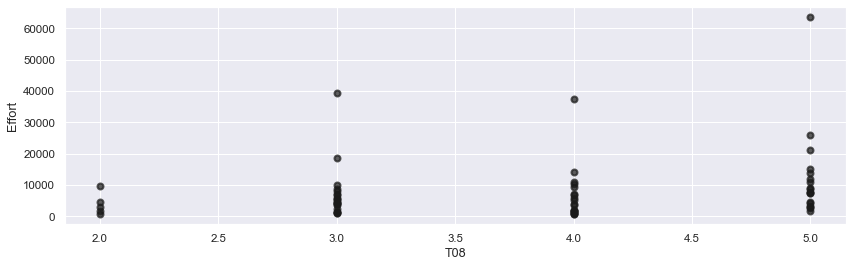

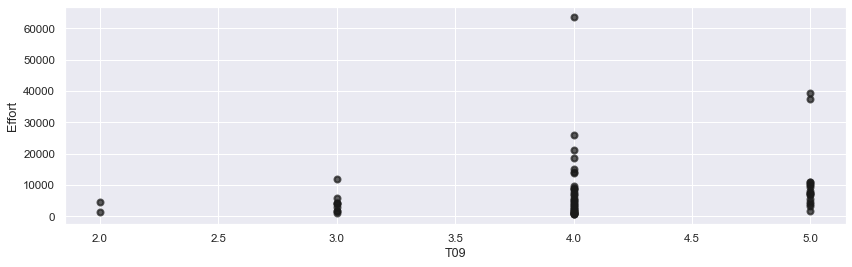

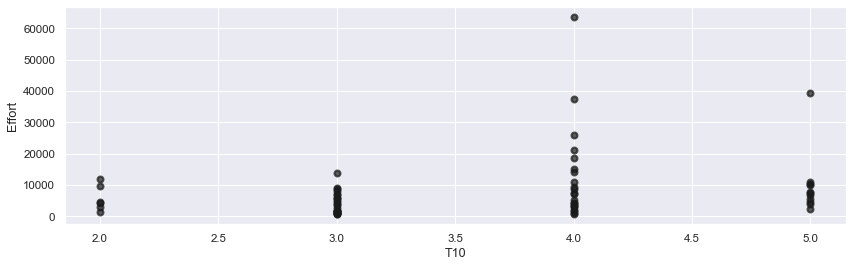

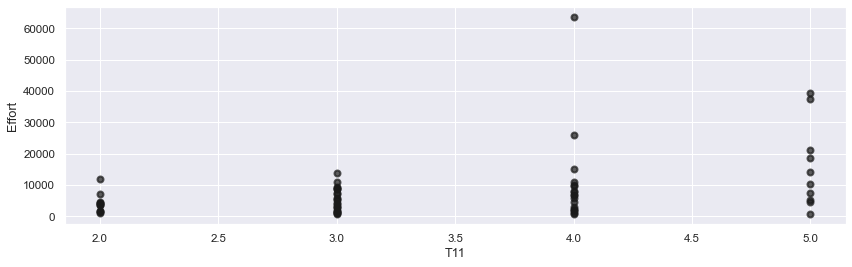

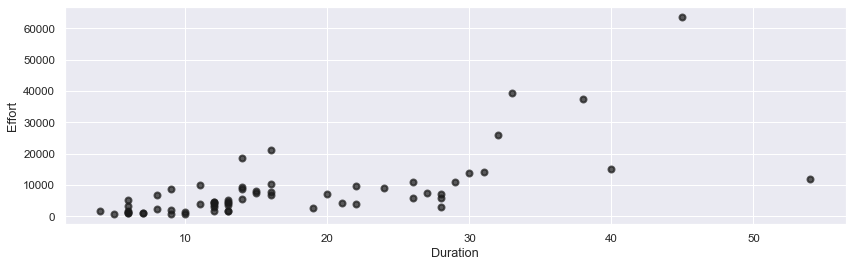

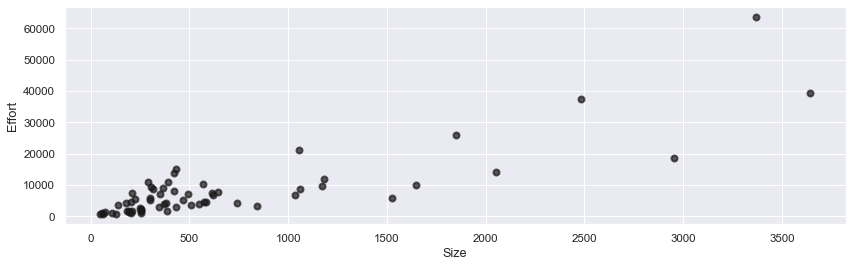

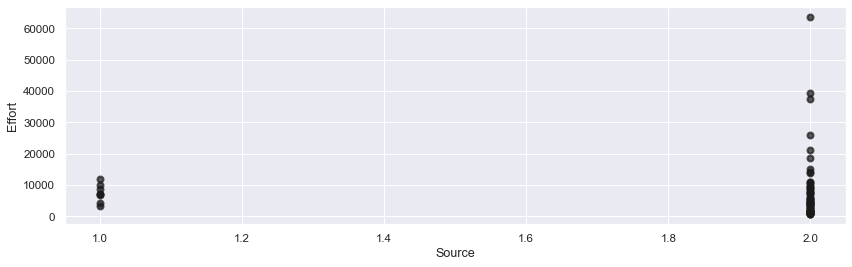

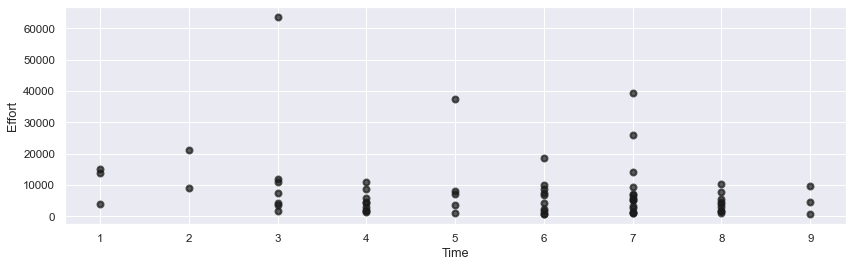

In [73]:
cols = ['Syear', 'App', 'Har', 'Dba', 'Ifc', 'Source', 'Telonuse', 'Nlan', 'T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'Duration', 'Size', 'Time']
features = mw[['App', 'T07', 'T08', 'T09', 'T10', 'T11', 'Duration', 'Size', 'Source', 'Time']]
for i, cols in enumerate(features):
    plt.figure(figsize=(14,4))
    plt.scatter(mw[cols], mw['Effort'], lw=2, alpha= 0.7, c='k' )
    plt.xlabel(cols)
    plt.ylabel('Effort')
    plt.show()

## Data Pre-Processing

##### Data Split

In [74]:
X = mw.drop(['Syear', 'Effort'], axis = 1)
y = mw['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [76]:
X3 = mw[['App', 'T07', 'T08', 'T09', 'T10', 'T11', 'Duration', 'Size', 'Source', 'Time']]
y3 = mw['Effort']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [77]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## Linear Regression

In [78]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

lr2 = LinearRegression()
lr2.fit(X2_train,y2_train)

lr3 = LinearRegression()
lr3.fit(X3_train,y3_train)

lr4 = LinearRegression()
lr4.fit(X4_train,y4_train)

LinearRegression()

In [79]:
lr1_pred = lr1.predict(X_test)
lr2_pred = lr2.predict(X2_test)
lr3_pred = lr3.predict(X3_test)
lr4_pred = lr4.predict(X4_test)

Linear Regression Performance:

all features, No scaling:
MAE: 5926.624443474609
RMSE: 9334.954572191074
R2_Score:  0.6745134242514945

all features, with scaling:
MAE: 5809.407473705812
RMSE: 10857.73016334394
R2_Score:  0.5596614049367712

selected features, No scaling:
MAE: 4645.251475554062
RMSE: 9020.051077066313
R2_Score:  0.6961028289393616

selected features, with scaling:
MAE: 5264.301379602544
RMSE: 10337.790198285064
R2_Score:  0.6008243033816661


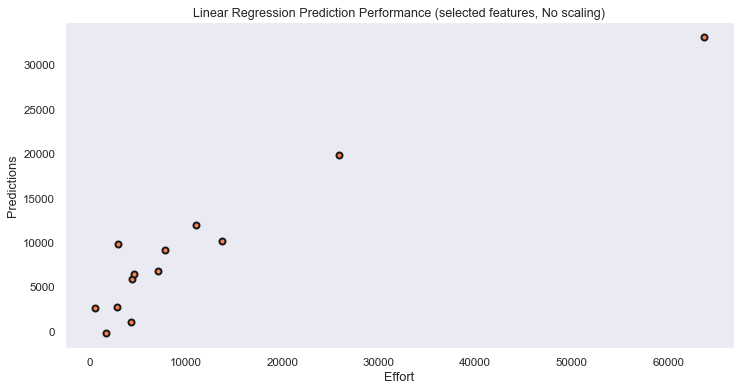

In [80]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lr1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lr1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lr2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lr2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lr2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lr3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lr3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lr3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, lr4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, lr4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, lr4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,lr3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (selected features, No scaling)') 
plt.grid()
plt.show()

## ElasticNet Regression

In [81]:
en1 = ElasticNet()
en1.fit(X_train,y_train)

en2 = ElasticNet()
en2.fit(X2_train,y2_train)

en3 = ElasticNet()
en3.fit(X3_train,y3_train)

en4 = ElasticNet()
en4.fit(X4_train,y4_train)

ElasticNet()

In [82]:
en1_pred = en1.predict(X_test)
en2_pred = en2.predict(X2_test)
en3_pred = en3.predict(X3_test)
en4_pred = en4.predict(X4_test)

ElasticNet Regression Performance:

all features, No scaling:
MAE: 4520.7145655965705
RMSE: 8841.665115169873
R2_Score:  0.7080040774212135

all features, with scaling:
MAE: 6340.972670391983
RMSE: 12371.895901137443
R2_Score:  0.42828290542639724

selected features, No scaling:
MAE: 4243.335704281057
RMSE: 8975.153511427843
R2_Score:  0.6991206135973025

selected features, with scaling:
MAE: 6138.51419579097
RMSE: 12202.14692637775
R2_Score:  0.4438638016327362


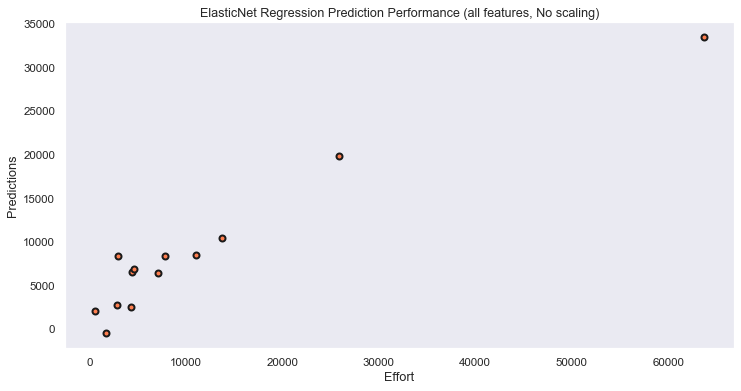

In [83]:
print('ElasticNet Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, en1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, en1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, en1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, en2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, en2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, en2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, en3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, en3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, en3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, en4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, en4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, en4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,en1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('ElasticNet Regression Prediction Performance (all features, No scaling)') 
plt.grid()
plt.show()

## SGD Regressor

In [84]:
sgd2 = SGDRegressor()
sgd2.fit(X2_train,y2_train)

sgd4 = SGDRegressor()
sgd4.fit(X4_train,y4_train)

SGDRegressor()

In [85]:
sgd2_pred = sgd2.predict(X2_test)
sgd4_pred = sgd4.predict(X4_test)

SGD Regressor Performance:

all features, with scaling:
MAE: 6177.744086193018
RMSE: 11067.380096612314
R2_Score:  0.5424923979123788

selected features, with scaling:
MAE: 5322.224463655688
RMSE: 10412.843796177824
R2_Score:  0.5950071361358004


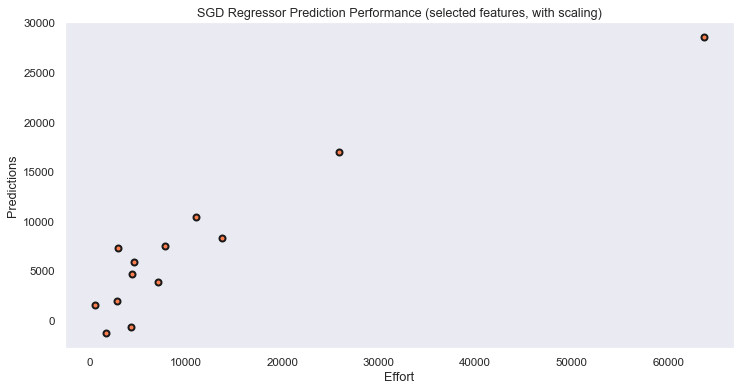

In [86]:
print('SGD Regressor Performance:')

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, sgd2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, sgd2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, sgd2_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, sgd4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, sgd4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, sgd4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,sgd4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('SGD Regressor Prediction Performance (selected features, with scaling)') 
plt.grid()
plt.show()

## K-Neighbors Regressor

In [87]:
kn1 = KNeighborsRegressor()
kn1.fit(X_train,y_train)

kn2 = KNeighborsRegressor()
kn2.fit(X2_train,y2_train)

kn3 = KNeighborsRegressor()
kn3.fit(X3_train,y3_train)

kn4 = KNeighborsRegressor()
kn4.fit(X4_train,y4_train)

KNeighborsRegressor()

In [88]:
kn1_pred = kn1.predict(X_test)
kn2_pred = kn2.predict(X2_test)
kn3_pred = kn3.predict(X3_test)
kn4_pred = kn4.predict(X4_test)

KNeighbors Regressor Performance:

all features, No scaling:
MAE: 6067.753846153845
RMSE: 11802.68540003959
R2_Score:  0.47968023181463304

all features, with scaling:
MAE: 6671.3076923076915
RMSE: 13776.379322817511
R2_Score:  0.2911100028388156

selected features, No scaling:
MAE: 6067.753846153845
RMSE: 11802.68540003959
R2_Score:  0.47968023181463304

selected features, with scaling:
MAE: 5959.030769230769
RMSE: 12074.591689608773
R2_Score:  0.4554301774481547


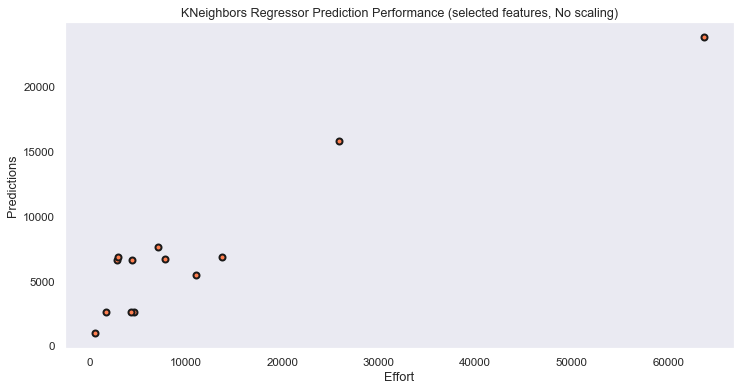

In [89]:
print('KNeighbors Regressor Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, kn1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, kn1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, kn1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, kn2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, kn2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, kn2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, kn3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, kn3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, kn3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, kn4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, kn4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, kn4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,kn3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('KNeighbors Regressor Prediction Performance (selected features, No scaling)') 
plt.grid()
plt.show()

## Decision Tree Regressor

In [90]:
dt1 = DecisionTreeRegressor()
dt1.fit(X_train,y_train)

dt3 = DecisionTreeRegressor()
dt3.fit(X3_train,y3_train)

DecisionTreeRegressor()

In [91]:
dt1_pred = dt1.predict(X_test)
dt3_pred = dt3.predict(X3_test)

Decision Tree Regressor Performance:

all features, No scaling:
MAE: 5600.384615384615
RMSE: 9130.258177325293
R2_Score:  0.6886314241168036

selected features, No scaling:
MAE: 6302.538461538462
RMSE: 13399.164821849045
R2_Score:  0.32939911465430016


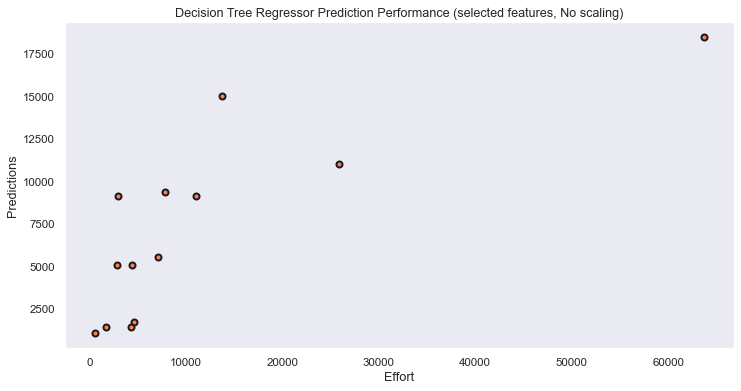

In [92]:
print('Decision Tree Regressor Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, dt1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, dt1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, dt3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, dt3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, dt3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,dt3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Decision Tree Regressor Prediction Performance (selected features, No scaling)') 
plt.grid()
plt.show()

## MLP

In [93]:
mlp1 = MLPRegressor(max_iter=15000, hidden_layer_sizes=(50, 50))
mlp1.fit(X_train,y_train)

mlp2 = MLPRegressor(max_iter=15000, hidden_layer_sizes=(50, 50))
mlp2.fit(X2_train,y2_train)

mlp3 = MLPRegressor(max_iter=15000, hidden_layer_sizes=(50, 50))
mlp3.fit(X3_train,y3_train)

mlp4 = MLPRegressor(max_iter=15000, hidden_layer_sizes=(50, 50))
mlp4.fit(X4_train,y4_train)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=15000)

In [94]:
mlp1_pred = mlp1.predict(X_test)
mlp2_pred = mlp2.predict(X2_test)
mlp3_pred = mlp3.predict(X3_test)
mlp4_pred = mlp4.predict(X4_test)

MLP Performance:

all features, No scaling:
MAE: 5100.11638239763
RMSE: 9393.771708105478
R2_Score:  0.6703988890802157

all features, with scaling:
MAE: 5931.085237930352
RMSE: 12140.314351752644
R2_Score:  0.4494857969803624

selected features, No scaling:
MAE: 4313.37556745883
RMSE: 6573.274603020371
R2_Score:  0.8386116375662344

selected features, with scaling:
MAE: 6460.496864954733
RMSE: 10770.705174297007
R2_Score:  0.5666917678379974


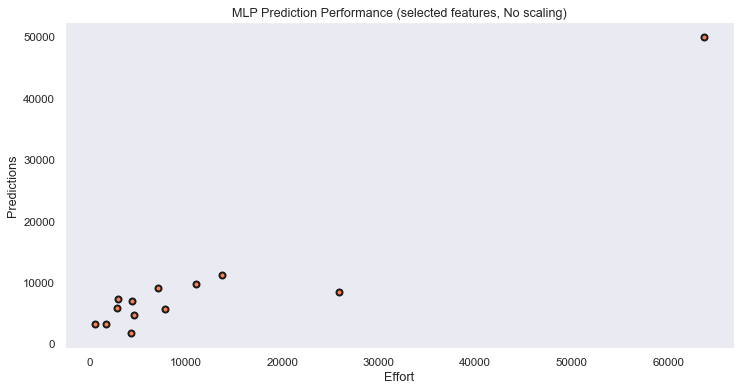

In [95]:
print('MLP Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, mlp1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mlp1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, mlp1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, mlp2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, mlp2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, mlp2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, mlp3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, mlp3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, mlp3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, mlp4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, mlp4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, mlp4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,mlp3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('MLP Prediction Performance (selected features, No scaling)') 
plt.grid()
plt.show()

##### Optimizing MLP

In [102]:
mlp_best_params = {'solver':['lbfgs'],
                  'max_iter':[15000, 30000],
                   'alpha':[0.0001, 0.001, 0.01],
                  'hidden_layer_sizes':[(50, 50), (10, 10, 10), (25, 25, 25)]}
mlp_grid = GridSearchCV(MLPRegressor(), mlp_best_params, verbose=3, n_jobs=-1) 

In [103]:
mlp_grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.7s finished


GridSearchCV(estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50, 50), (10, 10, 10),
                                                (25, 25, 25)],
                         'max_iter': [15000, 30000], 'solver': ['lbfgs']},
             verbose=3)

In [104]:
mlp_grid.best_params_

{'alpha': 0.01,
 'hidden_layer_sizes': (10, 10, 10),
 'max_iter': 15000,
 'solver': 'lbfgs'}

In [105]:
mlp_grid.best_estimator_

MLPRegressor(alpha=0.01, hidden_layer_sizes=(10, 10, 10), max_iter=15000,
             solver='lbfgs')

In [106]:
mlp_grid_predictions = mlp_grid.predict(X_test)

MAE: 4841.752630280759
RMSE: 9515.101431578974
R2_Score:  0.661829664602577


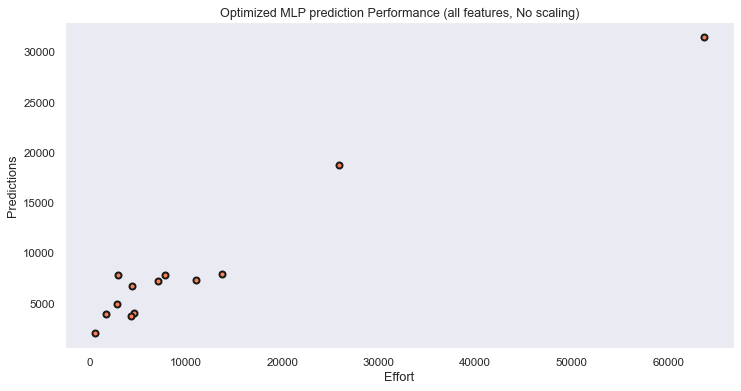

In [107]:
print('MAE:', metrics.mean_absolute_error(y4_test, mlp_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, mlp_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y4_test, mlp_grid_predictions))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,mlp_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Optimized MLP prediction Performance (all features, No scaling)') 
plt.grid()
plt.show()

## AdaBoost Regressor

In [108]:
ab1 = AdaBoostRegressor()
ab1.fit(X_train,y_train)

ab2 = AdaBoostRegressor()
ab2.fit(X2_train,y2_train)

ab3 = AdaBoostRegressor()
ab3.fit(X3_train,y3_train)

ab4 = AdaBoostRegressor()
ab4.fit(X4_train,y4_train)

AdaBoostRegressor()

In [109]:
ab1_pred = ab1.predict(X_test)
ab2_pred = ab2.predict(X2_test)
ab3_pred = ab3.predict(X3_test)
ab4_pred = ab4.predict(X4_test)

AdaBoost Regressor Performance:

all features, No scaling:
MAE: 5217.360015680913
RMSE: 8764.96271296333
R2_Score:  0.7130482950255583

all features, with scaling:
MAE: 5323.376982210169
RMSE: 9067.9584808061
R2_Score:  0.6928661316940773

selected features, No scaling:
MAE: 4998.813313929661
RMSE: 8713.922753671128
R2_Score:  0.7163805077591389

selected features, with scaling:
MAE: 6706.6150987901
RMSE: 13626.030799808448
R2_Score:  0.3064985135707353


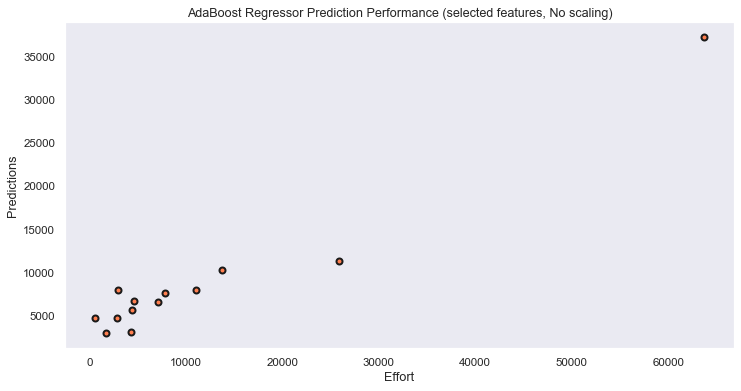

In [110]:
print('AdaBoost Regressor Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, ab1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ab1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, ab1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, ab2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, ab2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, ab2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, ab3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, ab3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, ab3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, ab4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, ab4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, ab4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,ab3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('AdaBoost Regressor Prediction Performance (selected features, No scaling)') 
plt.grid()
plt.show()

##### Optimizing AdaBoost

In [111]:
ab_best_params = {'base_estimator':[mlp_grid.best_estimator_],
                 'n_estimators':[70]}
ab_grid = GridSearchCV(AdaBoostRegressor(), ab_best_params, verbose=3, n_jobs=-1)

In [112]:
ab_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished
Q:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'base_estimator': [MLPRegressor(alpha=0.01,
                                                         hidden_layer_sizes=(10,
                                                                             10,
                                                                             10),
                                                         max_iter=15000,
                                                         solver='lbfgs')],
                         'n_estimators': [70]},
             verbose=3)

In [113]:
ab_grid.best_params_

{'base_estimator': MLPRegressor(alpha=0.01, hidden_layer_sizes=(10, 10, 10), max_iter=15000,
              solver='lbfgs'),
 'n_estimators': 70}

In [114]:
ab_grid.best_estimator_

AdaBoostRegressor(base_estimator=MLPRegressor(alpha=0.01,
                                              hidden_layer_sizes=(10, 10, 10),
                                              max_iter=15000, solver='lbfgs'),
                  n_estimators=70)

In [115]:
ab_grid_predictions = ab_grid.predict(X_test)

MAE: 4190.483259234695
RMSE: 7979.550160581125
R2_Score:  0.7621706319158685


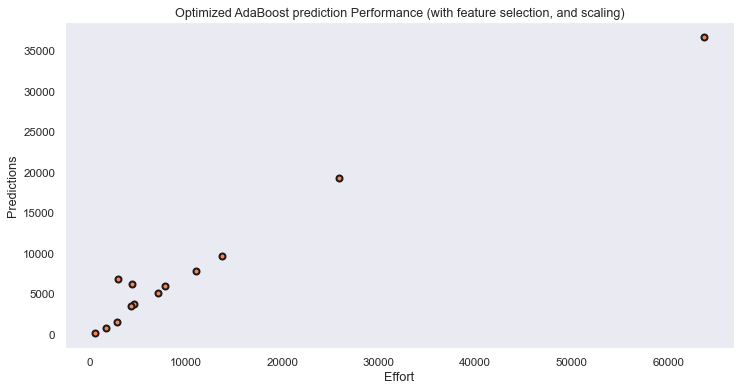

In [116]:
print('MAE:', metrics.mean_absolute_error(y_test, ab_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ab_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, ab_grid_predictions))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,ab_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Optimized AdaBoost prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

## AdaBoost (KNeighbors)

In [117]:
ab5 = AdaBoostRegressor(base_estimator=KNeighborsRegressor())
ab5.fit(X_train,y_train)

ab6 = AdaBoostRegressor(base_estimator=KNeighborsRegressor())
ab6.fit(X2_train,y2_train)

ab7 = AdaBoostRegressor(base_estimator=KNeighborsRegressor())
ab7.fit(X3_train,y3_train)

ab8 = AdaBoostRegressor(base_estimator=KNeighborsRegressor())
ab8.fit(X4_train,y4_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor())

In [118]:
ab5_pred = ab5.predict(X_test)
ab6_pred = ab6.predict(X2_test)
ab7_pred = ab7.predict(X3_test)
ab8_pred = ab8.predict(X4_test)

AdaBoost Regressor Performance:

all features, No scaling:
MAE: 5386.5230769230775
RMSE: 8213.430636744635
R2_Score:  0.7480247693640296

all features, with scaling:
MAE: 6662.338461538462
RMSE: 14291.26267382654
R2_Score:  0.2371311760447402

selected features, No scaling:
MAE: 5589.738461538462
RMSE: 9108.493364732974
R2_Score:  0.6901141426051022

selected features, with scaling:
MAE: 5650.0
RMSE: 10075.606145537846
R2_Score:  0.6208151047482959


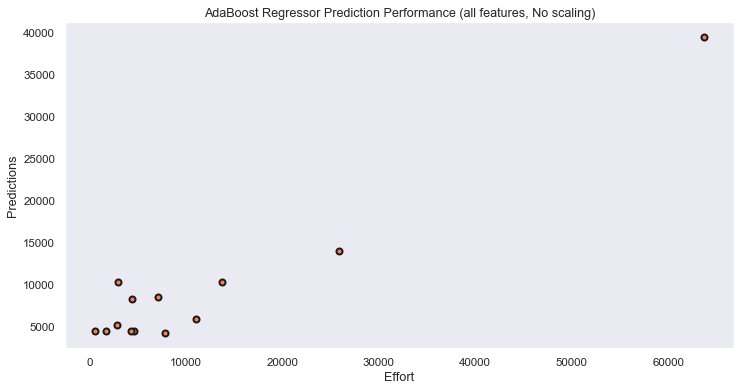

In [121]:
print('AdaBoost Regressor Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, ab5_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ab5_pred)))
print('R2_Score: ', metrics.r2_score(y_test, ab5_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, ab6_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, ab6_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, ab6_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, ab7_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, ab7_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, ab7_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, ab8_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, ab8_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, ab8_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,ab5_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('AdaBoost Regressor Prediction Performance (all features, No scaling)') 
plt.grid()
plt.show()

## Gradient Tree Boosting

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
gt1 = GradientBoostingRegressor()
gt1.fit(X_train, y_train)

gt2 = GradientBoostingRegressor()
gt2.fit(X2_train, y2_train)

gt3 = GradientBoostingRegressor()
gt3.fit(X3_train, y3_train)

gt4 = GradientBoostingRegressor()
gt4.fit(X4_train, y4_train)

GradientBoostingRegressor()

In [123]:
gt1_pred = gt1.predict(X_test)
gt2_pred = gt2.predict(X2_test)
gt3_pred = gt3.predict(X3_test)
gt4_pred = gt4.predict(X4_test)

Gradient Tree Boosting Regressor Performance:

All features, No scaling:
MAE: 4474.897383958401
RMSE: 9230.912117978085
R2_Score:  0.6817283934185584

All features,with scaling:
MAE: 5593.511936449651
RMSE: 10299.311435530291
R2_Score:  0.6037903533691582

Selected features, No scaling:
MAE: 5373.110733537492
RMSE: 11293.635791560522
R2_Score:  0.5235950998431466

Selected features,with scaling:
MAE: 5708.341472579456
RMSE: 11074.27951603756
R2_Score:  0.5419217984201588


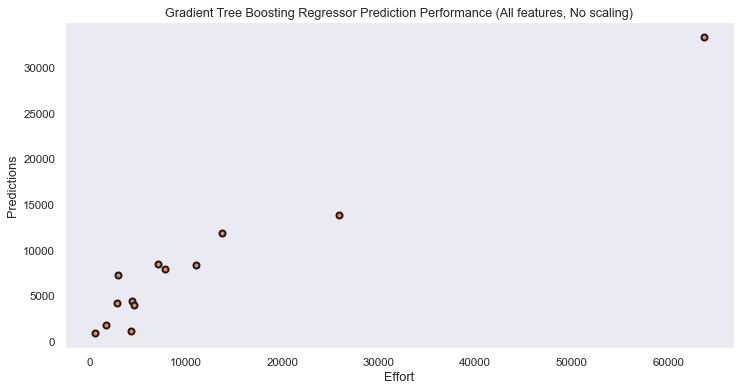

In [124]:
print('Gradient Tree Boosting Regressor Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, gt1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gt1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gt1_pred))

print('\nAll features,with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, gt2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, gt2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, gt2_pred))

print('\nSelected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, gt3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, gt3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, gt3_pred))

print('\nSelected features,with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, gt4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, gt4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, gt4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gt1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort') 
plt.ylabel('Predictions') 
plt.title('Gradient Tree Boosting Regressor Prediction Performance (All features, No scaling)') 
plt.grid()
plt.show()